# Exploring Relationships between US Election & COVID-19

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")
%matplotlib inline

## Data Sources

Source: https://www.nbcnews.com/politics/2020-elections/president-results

Date: November 14, 2020


In [2]:
presidential_results = "input/us-presidential-results-2020.csv"

presidential_data = pd.read_csv(presidential_results,
                               index_col="state",
                               thousands=",")
presidential_data.dtypes

biden    int64
trump    int64
dtype: object

In [3]:
presidential_data.tail(5)

,biden,trump
state,,
Virginia,2413317,1962708
Washington,2356584,1572345
West Virginia,235657,544826
Wisconsin,1630619,1610073
Wyoming,73491,193559


In [4]:
presidential_data['voters'] = presidential_data.trump + presidential_data.biden
presidential_data['trump_pct'] = 100*presidential_data.trump / presidential_data.voters


## COVID-19 Data

Source: https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

Date: November 14, 2020

In [5]:
covid_raw_cases = "input/us-covid-11-14-2020.csv"

covid_data = pd.read_csv(covid_raw_cases, skiprows=3)
covid_data.rename(columns= { "State/Territory" : "state",
                             "Total Cases" : "cases",
                             "Case Rate per 100000" : "case_rate",
                             "Case Rate per 100000 in Last 7 Days" : "case_rate_7days"
                           },
                  inplace=True)
covid_data.shape

(61, 13)

In [6]:
covid_data.head(5)

,state,cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,case_rate,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,case_rate_7days,Death Rate per 100K in Last 7 Days
0,Alaska,22405,NaN,NaN,4808,3038,97,NaN,NaN,13,13,93.1,0.3
1,Alabama,213617,180275.0,33342.0,12903,4370,3231,2989.0,242.0,182,66,37.7,0.5
2,Arkansas,130318,NaN,NaN,11088,4324,2148,NaN,NaN,92,71,52.6,0.4
3,American Samoa,3,NaN,NaN,3,5,0,NaN,NaN,0,0,0.8,0.0
4,Arizona,269577,262454.0,7123.0,14813,3759,6257,5806.0,451.0,148,87,29.5,0.3


In [7]:
covid_data = covid_data[["state", "cases", "case_rate", "case_rate_7days"]]

## Merging Voting data + COVID-19 data

In [8]:
data = presidential_data.join(covid_data.set_index('state'), on="state", how="inner")

In [9]:
data.dtypes

biden                int64
trump                int64
voters               int64
trump_pct          float64
cases                int64
case_rate            int64
case_rate_7days    float64
dtype: object

In [10]:
data

,biden,trump,voters,trump_pct,cases,case_rate,case_rate_7days
state,,,,,,,
Alabama,843473,1434159,2277632,62.967108,213617,4370,37.7
Alaska,143037,179080,322117,55.594706,22405,3038,93.1
Arizona,1672054,1661677,3333731,49.844364,269577,3759,29.5
Arkansas,419258,758183,1177441,64.392441,130318,4324,52.6
California,10760110,5750654,16510764,34.829727,998502,2524,17.1
Colorado,1803873,1364160,3168033,43.060158,154038,2704,74.2
Connecticut,1080387,714973,1795360,39.823378,88645,2481,42.1
Delaware,296268,200603,496871,40.373256,28016,2897,26.0
District of Columbia,307265,18172,325437,5.583876,18666,2657,17.8


## Visualizing

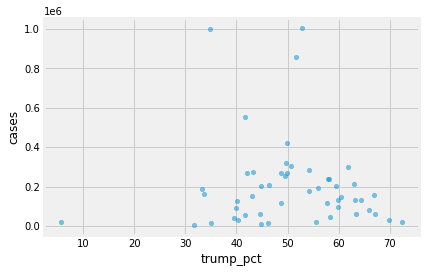

In [11]:
data.plot(kind='scatter', x='trump_pct', y='cases', alpha=0.5)

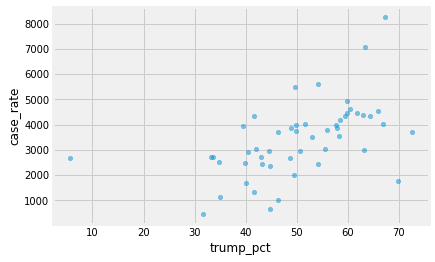

In [12]:
data.plot(kind='scatter', x='trump_pct', y='case_rate', alpha=0.5)

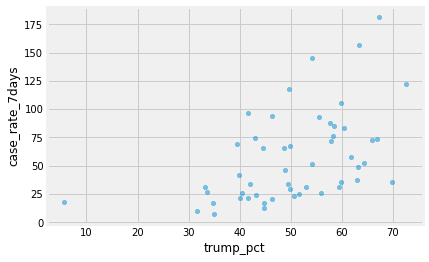

In [13]:
data.plot(kind='scatter', x='trump_pct', y='case_rate_7days', alpha=0.5)

Text(1.6750000000000043, 0.5, 'COVID Cases per 100,000 in last 7 days (11/14/2020)')

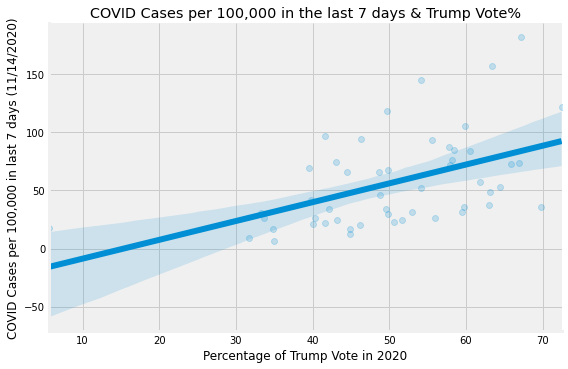

In [14]:
# plotting a regression line
sns.lmplot(x='trump_pct', y='case_rate_7days', data=data, aspect=1.6, scatter_kws={'alpha':0.2});
plt.title("COVID Cases per 100,000 in the last 7 days & Trump Vote%")
plt.xlabel("Percentage of Trump Vote in 2020")
plt.ylabel("COVID Cases per 100,000 in last 7 days (11/14/2020)")

## Linear Regression in sklearn

In [15]:
# single variable linear regression
feature_cols = ['trump_pct']
X = data[feature_cols]
y = data.case_rate_7days

X.head()

,trump_pct
state,
Alabama,62.967108
Alaska,55.594706
Arizona,49.844364
Arkansas,64.392441
California,34.829727


### sklearn 4-steps ML¶

In [16]:
# Step 1: Import the model class

from sklearn.linear_model import LinearRegression

In [17]:
# Step 2: Instantiate the estimator

model = LinearRegression()

In [18]:
# Step 3: Fit the model with data (training)

model.fit(X,y)

LinearRegression()

In [19]:
# Step 4: Predict response for new inputs

print(f"0%: {model.predict([[0.0]])}")
print(f"50%: {model.predict([[50.0]])}")
print(f"100%: {model.predict([[100.0]])}")

0%: [-24.86911891]
50%: [56.09133016]
100%: [137.05177922]


Let's look at the _intercept_ and _coeff_ : bring back the algebra!

In [20]:
print("intercept: {0}, coeff: {1}".
      format(model.intercept_, model.coef_))

intercept: -24.86911891182465, coeff: [1.61920898]


Recall that each model always contains some amount of random irreducible error $\epsilon$. So, given a prediction $\hat{y}$, the actual $y = \hat{y} + \epsilon$. Below, we will assume $y$ is exactly linear.

- We are often taught the formula for a line is: $y = mx + b$.
- Note this can alternatively be written: $y = \beta_0 + \beta_1 x$.

Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated # COVID-19 cases per 100,000 when the Trump vote percentage is 0.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the "trump_pct" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1 percentage for Trump is _associated with_ increasing the number of cases per 100,000 population by $\beta_1$.
- Here, a Trump vote percentage increase of 1 degree Celsius is _associated with_ a rental increase of 1.6 per 100,000 COVID-19 cases.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in Trump vote percentage was associated with a **decrease** in # COVID-19 cases per 100,000 population.
- $\beta_1$ would be **zero** if Trump vote percentage is not associated with COVID-19 cases per 100,000 population.

---

---

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).
- $\epsilon$ is the _error_ term

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. Note that because the $\beta$ values are constants, they will not be independent variables in the final model, as seen above.


---

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](./images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.


### Consider these 3 predictions again:

In [21]:
print(f"0%: {model.predict([[0.0]])}")
print(f"50%: {model.predict([[50.0]])}")
print(f"100%: {model.predict([[100.0]])}")

0%: [-24.86911891]
50%: [56.09133016]
100%: [137.05177922]
